In [5]:
import pandas as pd

# Load the actual dataset
df = pd.read_csv('/content/college_admissions.csv')

# Quick overview of data
print(df.head())
print(df.info())


   High school GPA  Extracurricular Activities  Parental Income  \
0             3.46                           0            46048   
1             3.52                           4            21395   
2             2.64                           1            76237   
3             3.57                           5            64987   
4             3.71                           0            30926   

   Study Hours/Week  Entrance Test Score  Distance from College (km)  \
0                12                   64                           9   
1                23                   77                           3   
2                24                   51                          36   
3                12                   78                          38   
4                18                   71                          18   

   Internet (Yes=1, No=0) Final Result  
0                       0         Fail  
1                       0         Pass  
2                       0         Fail  


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Step 1: Load the dataset
df = pd.read_csv('/content/college_admissions.csv')

In [14]:

# Step 2: Encode the target column (Pass=1, Fail=0)
label_encoder = LabelEncoder()
df['Final Result'] = label_encoder.fit_transform(df['Final Result'])

In [15]:
# Step 3: Features and target
X = df.drop(columns=['Final Result'])
y = df['Final Result']

# Step 4: Feature Scaling (important for logistic regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Step 5: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [17]:
# Step 6: Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [18]:
# Step 7: Make predictions
y_pred = model.predict(X_test)


In [19]:
# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [20]:
# Step 9: Print results
print("✅ Accuracy:", accuracy)
print("\n📊 Classification Report:\n", report)

✅ Accuracy: 0.9

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.92      0.92      0.92        13

    accuracy                           0.90        20
   macro avg       0.89      0.89      0.89        20
weighted avg       0.90      0.90      0.90        20



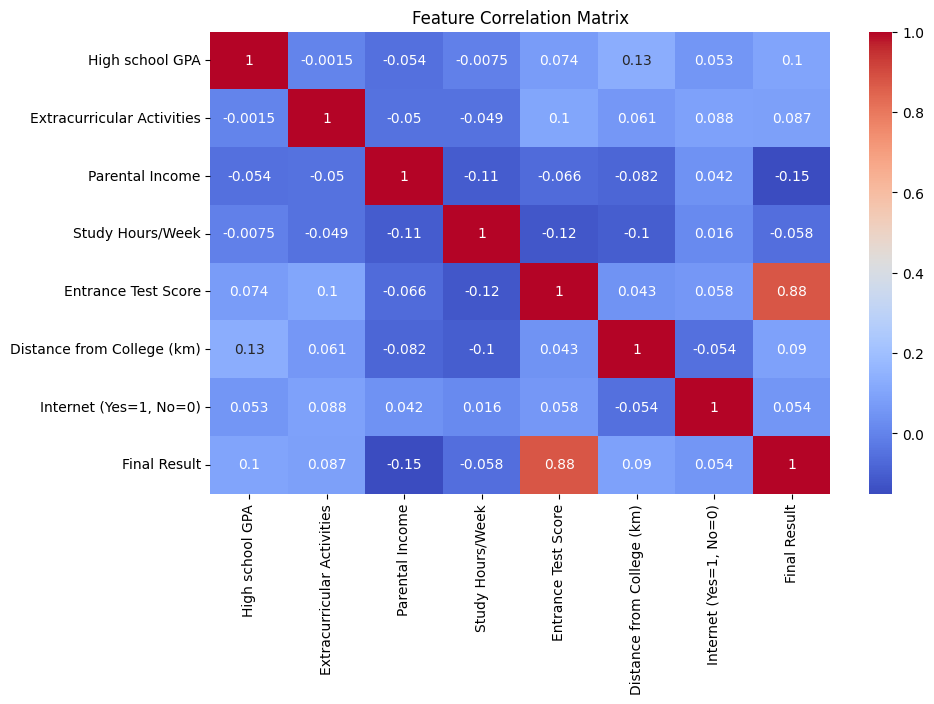

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()